<a href="https://colab.research.google.com/github/nthanhtin/Fashion_MNIST_cnn/blob/master/FashionMnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
#preprocessed data from keras datasets
(train_images, train_targets), (test_images, test_targets) = fashion_mnist.load_data()
#enumerate classes inside the dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


4423680/4422102 [==============================] - 0s 0us/step


In [0]:
from sklearn.model_selection import train_test_split
#data split into train and validation sets
train_images, val_images, train_targets, val_targets = train_test_split(train_images, train_targets, test_size=0.2)

train_images = train_images.reshape(48000,28,28,1)
val_images = val_images.reshape(12000,28,28,1)
test_images = test_images.reshape(10000,28,28,1)
#categorize target data into 10 classes
from tensorflow.keras.utils import to_categorical
train_targets = to_categorical(train_targets,10)
val_targets = to_categorical(val_targets,10)
test_targets = to_categorical(test_targets,10)


In [3]:
train_images.shape

(48000, 28, 28, 1)

In [4]:
train_targets.shape

(48000, 10)

In [5]:
val_images.shape

(12000, 28, 28, 1)

In [6]:
val_targets.shape

(12000, 10)

In [7]:
test_images.shape

(10000, 28, 28, 1)

In [0]:
#tensorflow would sometime gives error if not float32
train_images = train_images.astype('float32')/255
val_images = val_images.astype('float32')/255
test_images = test_images.astype('float32')/255

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten, normalization

Using TensorFlow backend.


In [0]:
#cnn model:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(0.25))
model.add(normalization.BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
#detail cnn model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 5, 5, 64)          256       
__________

In [12]:
history = model.fit(train_images, train_targets,
          batch_size=256,
          epochs=10,
          verbose=1,
          validation_data=(val_images, val_targets))
score = model.evaluate(test_images, test_targets, verbose=0)
#result below using colab GPU mode. CPU training would take longer

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 8s 157us/step - loss: 0.7267 - acc: 0.7307 - val_loss: 0.4170 - val_acc: 0.8436
Epoch 2/10
48000/48000 [==============================] - 4s 83us/step - loss: 0.4619 - acc: 0.8303 - val_loss: 0.3445 - val_acc: 0.8732
Epoch 3/10
48000/48000 [==============================] - 4s 83us/step - loss: 0.3991 - acc: 0.8541 - val_loss: 0.3283 - val_acc: 0.8763
Epoch 4/10
48000/48000 [==============================] - 4s 85us/step - loss: 0.3674 - acc: 0.8662 - val_loss: 0.2908 - val_acc: 0.8934
Epoch 5/10
48000/48000 [==============================] - 4s 82us/step - loss: 0.3415 - acc: 0.8732 - val_loss: 0.2773 - val_acc: 0.8977
Epoch 6/10
48000/48000 [==============================] - 4s 82us/step - loss: 0.3234 - acc: 0.8805 - val_loss: 0.2778 - val_acc: 0.8979
Epoch 7/10
48000/48000 [==============================] - 4s 82us/step - loss: 0.3119 - acc: 0.8843 - val_loss: 0.2694 - val_ac

In [13]:
score

[0.2651905277848244, 0.9027]

In [0]:
#data augmentation by fliping, moving and rotating object in frame
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(train_images, train_targets, batch_size=256)
val_batches = gen.flow(val_images, val_targets, batch_size=256)

In [0]:
history_aug = model.fit_generator(batches, steps_per_epoch=48000//256, epochs=50,
                    validation_data=val_batches, validation_steps=12000//256, use_multiprocessing=True)

In [16]:
#accuracy after improve model with data augmentation
score_aug = model.evaluate(test_images, test_targets, verbose=0)
score_aug

[0.260030701816082, 0.9024]

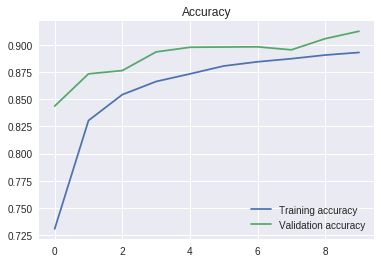

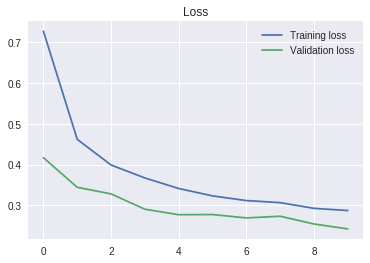

In [17]:
#accuracy and loss graph over trainning time
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(len(acc)),acc, label='Training accuracy')
plt.plot(range(len(val_acc)),val_acc, label='Validation accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

plt.plot(range(len(loss)),loss, label='Training loss')
plt.plot(range(len(val_loss)),val_loss, label='Validation loss')
plt.title('Loss')
plt.legend()
plt.show()

In [0]:
predicted = model.predict(test_images)

Predicted:  Ankle boot
Real:  Ankle boot


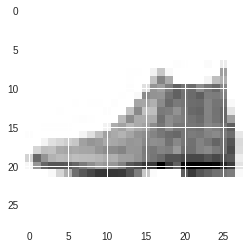

In [19]:
#try to predicted an object
#note: using model.predict_classes for normalized prediction-TO BE IMPROVE
import numpy as np
plt.imshow(test_images[0].reshape(28,28))
predicted[predicted<1e-2]=0
predicted[predicted>1e-2]=1
print('Predicted: ', class_names[np.nonzero(predicted[0])[0][0]])
print('Real: ', class_names[np.nonzero(test_targets[0])[0][0]])

In [20]:
print(predicted.shape)
print(test_targets.shape)

(10000, 10)
(10000, 10)


In [21]:
predicted = model.predict_classes(test_images)
predicted

array([9, 2, 1, ..., 8, 1, 5])

In [22]:
np.nonzero(test_targets)[1]

array([9, 2, 1, ..., 8, 1, 5])

Confusion matrix, without normalization
[[851   0   7  21   4   1 109   0   7   0]
 [  0 980   0  15   2   0   2   0   1   0]
 [ 12   0 787  10  50   0 141   0   0   0]
 [  5   3   5 930  23   0  33   0   1   0]
 [  1   0  18  34 797   0 148   0   2   0]
 [  0   0   0   0   0 987   0  11   0   2]
 [ 91   0  33  30  44   0 797   0   5   0]
 [  0   0   0   0   0   9   0 981   0  10]
 [  1   0   0   5   2   3   9   1 979   0]
 [  0   0   0   0   0  10   0  55   0 935]]


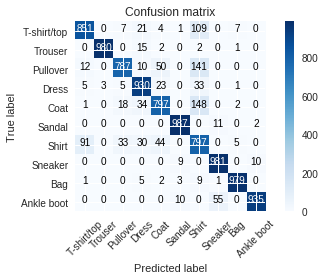

In [23]:
#show the confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
predicted = model.predict_classes(test_images)
confu = confusion_matrix(np.nonzero(test_targets)[1], predicted)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
plot_confusion_matrix(confu, classes=class_names)